In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv('data_pivotedP90.csv')

In [4]:
data.head(14)

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,2006,3.200000,4.016667,2.966667,NaN,NaN,3.650000,4.133333,4.966667,4.266667,3.166667,3.300000,5.166667,3.133333,4.166667
1,2007,3.566667,3.916667,3.033333,NaN,NaN,3.516667,4.000000,5.633333,4.350000,3.050000,3.350000,4.733333,3.150000,4.133333
2,2008,3.366667,3.783333,3.050000,3.400000,3.480000,3.483333,4.088889,5.466667,4.516667,3.250000,3.400000,4.583333,3.116667,4.300000
3,2009,3.566667,3.750000,3.000000,3.500000,3.650000,3.583333,4.000000,4.833333,4.900000,3.266667,3.400000,4.516667,3.233333,4.466667
4,2010,3.500000,3.916667,3.083333,3.600000,3.600000,3.533333,4.166667,4.666667,4.350000,3.233333,3.200000,4.450000,3.250000,4.500000
5,2011,3.533333,4.050000,3.083333,3.540000,3.540000,3.750000,4.166667,4.550000,4.150000,3.283333,3.066667,4.466667,3.233333,4.666667
6,2012,3.400000,4.083333,3.016667,3.466667,3.433333,3.650000,4.216667,4.716667,4.416667,3.300000,3.162500,4.466667,3.316667,4.500000
7,2013,3.366667,4.633333,3.066667,3.400000,3.466667,3.616667,4.300000,4.683333,4.450000,3.316667,3.083333,4.716667,3.350000,4.900000
8,2014,3.300000,4.466667,3.033333,3.333333,3.566667,3.600000,4.433333,4.666667,4.866667,3.233333,3.116667,4.533333,3.300000,5.000000
9,2015,3.266667,4.400000,3.033333,3.400000,3.600000,3.533333,4.666667,4.700000,5.100000,3.800000,3.100000,4.666667,3.266667,4.833333


In [5]:
data_noyear = data.drop('Year', axis=1)

In [6]:
data_noyear.head(14)

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,3.200000,4.016667,2.966667,NaN,NaN,3.650000,4.133333,4.966667,4.266667,3.166667,3.300000,5.166667,3.133333,4.166667
1,3.566667,3.916667,3.033333,NaN,NaN,3.516667,4.000000,5.633333,4.350000,3.050000,3.350000,4.733333,3.150000,4.133333
2,3.366667,3.783333,3.050000,3.400000,3.480000,3.483333,4.088889,5.466667,4.516667,3.250000,3.400000,4.583333,3.116667,4.300000
3,3.566667,3.750000,3.000000,3.500000,3.650000,3.583333,4.000000,4.833333,4.900000,3.266667,3.400000,4.516667,3.233333,4.466667
4,3.500000,3.916667,3.083333,3.600000,3.600000,3.533333,4.166667,4.666667,4.350000,3.233333,3.200000,4.450000,3.250000,4.500000
5,3.533333,4.050000,3.083333,3.540000,3.540000,3.750000,4.166667,4.550000,4.150000,3.283333,3.066667,4.466667,3.233333,4.666667
6,3.400000,4.083333,3.016667,3.466667,3.433333,3.650000,4.216667,4.716667,4.416667,3.300000,3.162500,4.466667,3.316667,4.500000
7,3.366667,4.633333,3.066667,3.400000,3.466667,3.616667,4.300000,4.683333,4.450000,3.316667,3.083333,4.716667,3.350000,4.900000
8,3.300000,4.466667,3.033333,3.333333,3.566667,3.600000,4.433333,4.666667,4.866667,3.233333,3.116667,4.533333,3.300000,5.000000
9,3.266667,4.400000,3.033333,3.400000,3.600000,3.533333,4.666667,4.700000,5.100000,3.800000,3.100000,4.666667,3.266667,4.833333


In [7]:
data_backforwardfilled=data_noyear.bfill()
data_backforwardfilled

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,3.200000,4.016667,2.966667,3.400000,3.480000,3.650000,4.133333,4.966667,4.266667,3.166667,3.300000,5.166667,3.133333,4.166667
1,3.566667,3.916667,3.033333,3.400000,3.480000,3.516667,4.000000,5.633333,4.350000,3.050000,3.350000,4.733333,3.150000,4.133333
2,3.366667,3.783333,3.050000,3.400000,3.480000,3.483333,4.088889,5.466667,4.516667,3.250000,3.400000,4.583333,3.116667,4.300000
3,3.566667,3.750000,3.000000,3.500000,3.650000,3.583333,4.000000,4.833333,4.900000,3.266667,3.400000,4.516667,3.233333,4.466667
4,3.500000,3.916667,3.083333,3.600000,3.600000,3.533333,4.166667,4.666667,4.350000,3.233333,3.200000,4.450000,3.250000,4.500000
5,3.533333,4.050000,3.083333,3.540000,3.540000,3.750000,4.166667,4.550000,4.150000,3.283333,3.066667,4.466667,3.233333,4.666667
6,3.400000,4.083333,3.016667,3.466667,3.433333,3.650000,4.216667,4.716667,4.416667,3.300000,3.162500,4.466667,3.316667,4.500000
7,3.366667,4.633333,3.066667,3.400000,3.466667,3.616667,4.300000,4.683333,4.450000,3.316667,3.083333,4.716667,3.350000,4.900000
8,3.300000,4.466667,3.033333,3.333333,3.566667,3.600000,4.433333,4.666667,4.866667,3.233333,3.116667,4.533333,3.300000,5.000000
9,3.266667,4.400000,3.033333,3.400000,3.600000,3.533333,4.666667,4.700000,5.100000,3.800000,3.100000,4.666667,3.266667,4.833333


In [8]:
data_interpolate=data_noyear.interpolate()
data_interpolate

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,3.200000,4.016667,2.966667,NaN,NaN,3.650000,4.133333,4.966667,4.266667,3.166667,3.300000,5.166667,3.133333,4.166667
1,3.566667,3.916667,3.033333,NaN,NaN,3.516667,4.000000,5.633333,4.350000,3.050000,3.350000,4.733333,3.150000,4.133333
2,3.366667,3.783333,3.050000,3.400000,3.480000,3.483333,4.088889,5.466667,4.516667,3.250000,3.400000,4.583333,3.116667,4.300000
3,3.566667,3.750000,3.000000,3.500000,3.650000,3.583333,4.000000,4.833333,4.900000,3.266667,3.400000,4.516667,3.233333,4.466667
4,3.500000,3.916667,3.083333,3.600000,3.600000,3.533333,4.166667,4.666667,4.350000,3.233333,3.200000,4.450000,3.250000,4.500000
5,3.533333,4.050000,3.083333,3.540000,3.540000,3.750000,4.166667,4.550000,4.150000,3.283333,3.066667,4.466667,3.233333,4.666667
6,3.400000,4.083333,3.016667,3.466667,3.433333,3.650000,4.216667,4.716667,4.416667,3.300000,3.162500,4.466667,3.316667,4.500000
7,3.366667,4.633333,3.066667,3.400000,3.466667,3.616667,4.300000,4.683333,4.450000,3.316667,3.083333,4.716667,3.350000,4.900000
8,3.300000,4.466667,3.033333,3.333333,3.566667,3.600000,4.433333,4.666667,4.866667,3.233333,3.116667,4.533333,3.300000,5.000000
9,3.266667,4.400000,3.033333,3.400000,3.600000,3.533333,4.666667,4.700000,5.100000,3.800000,3.100000,4.666667,3.266667,4.833333


In [9]:
data_noyear.describe()

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
count,14.000000,14.000000,15.000000,12.000000,12.000000,13.000000,13.000000,15.000000,14.000000,14.000000,15.000000,14.000000,14.000000,14.000000
mean,3.426190,4.115476,3.026667,3.417222,3.558611,3.567949,4.279915,4.901111,4.671429,3.490476,3.176389,4.519048,3.196429,4.566667
std,0.114114,0.255325,0.038214,0.091252,0.075845,0.104408,0.214873,0.305470,0.379633,0.393848,0.122956,0.269921,0.094321,0.262467
min,3.200000,3.750000,2.966667,3.300000,3.433333,3.366667,4.000000,4.550000,4.150000,3.050000,3.066667,4.100000,3.033333,4.133333
25%,3.366667,3.937500,3.008333,3.358333,3.495000,3.516667,4.133333,4.691667,4.366667,3.237500,3.100000,4.454167,3.133333,4.475000
50%,3.450000,4.066667,3.033333,3.400000,3.566667,3.583333,4.216667,4.833333,4.558333,3.291667,3.100000,4.508333,3.191667,4.516667
75%,3.500000,4.225000,3.041667,3.475000,3.608333,3.650000,4.433333,5.000000,4.891667,3.775000,3.250000,4.645833,3.262500,4.791667
max,3.566667,4.633333,3.083333,3.600000,3.666667,3.750000,4.666667,5.633333,5.400000,4.400000,3.400000,5.166667,3.350000,5.000000


EURO_COUNTRIES = ['Austria', 'Estonia', 'Finland', 'France', 'Germany', 'Ireland','Italy', 'Latvia','Lithuania','Luxembourg', 'Netherlands', 'Portugal','Slovenia','Spain']

In [10]:
data_backfilled_missingdropped=data_backforwardfilled.dropna()

In [11]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Austria'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -1.64
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.46
Stationary


In [12]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Estonia'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -1.26
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.65
Stationary


In [13]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Finland'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -3.93
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.00
Non-Stationary


In [14]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['France'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -1.26
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.65
Stationary


In [15]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Germany'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -5.22
Critial Values:
   1%, -4.33
Critial Values:
   5%, -3.23
Critial Values:
   10%, -2.75

p-value: 0.00
Non-Stationary


In [16]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Ireland'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -2.00
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.29
Stationary


In [17]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Italy'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.77
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.83
Stationary


In [18]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Spain'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -1.68
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.44
Stationary


In [19]:
len(data_backfilled_missingdropped['Spain'])
#14 countries, 13 rows, 182 variables

13

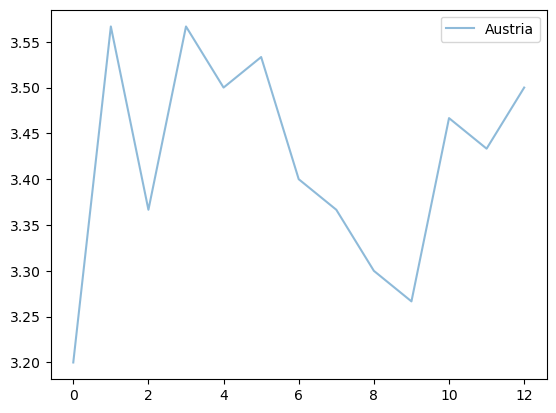

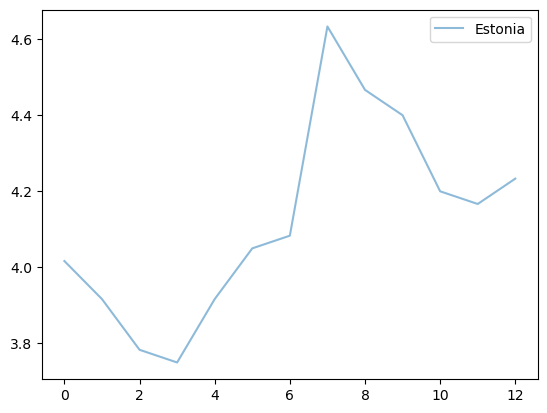

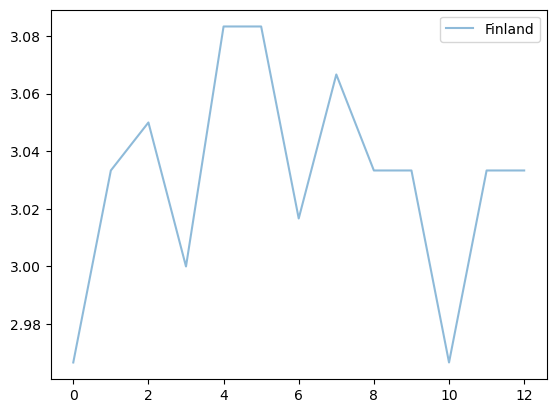

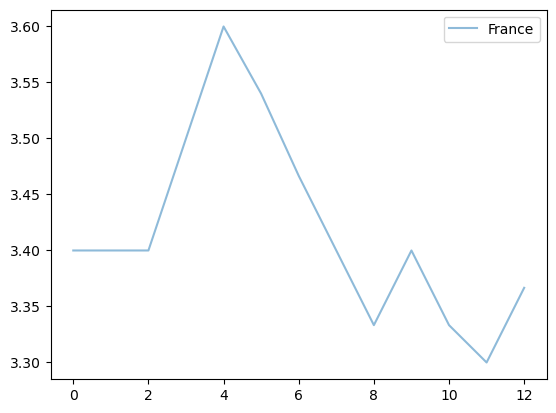

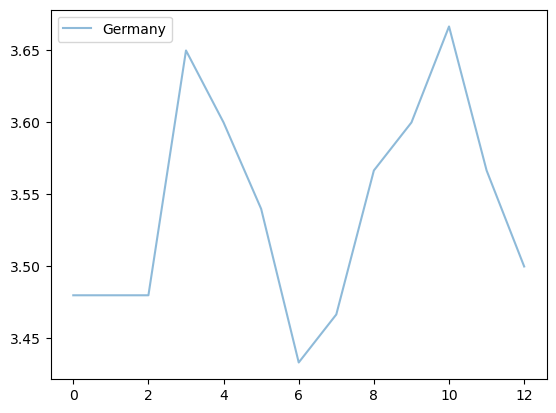

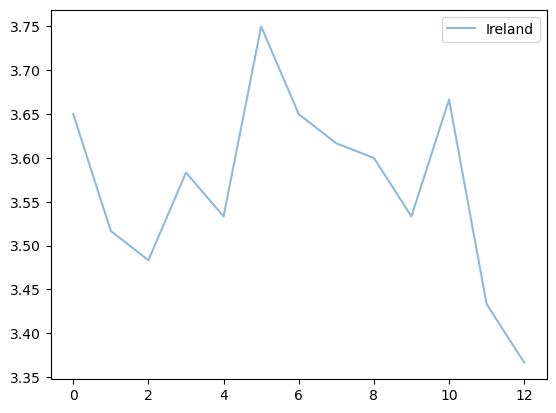

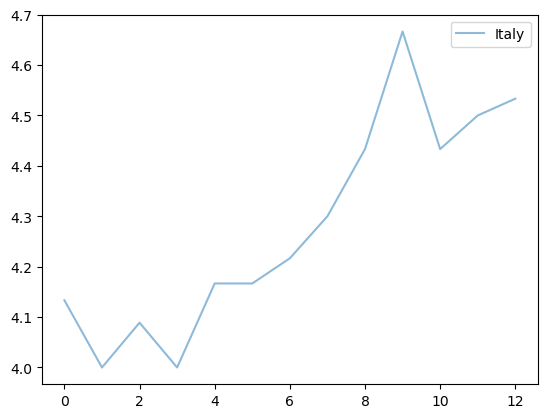

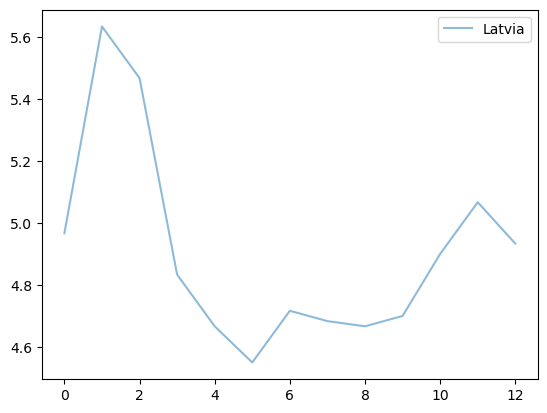

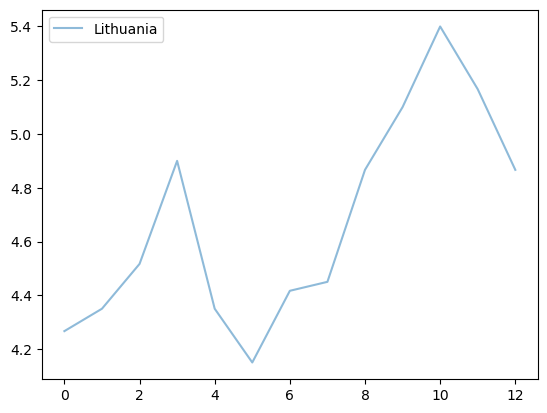

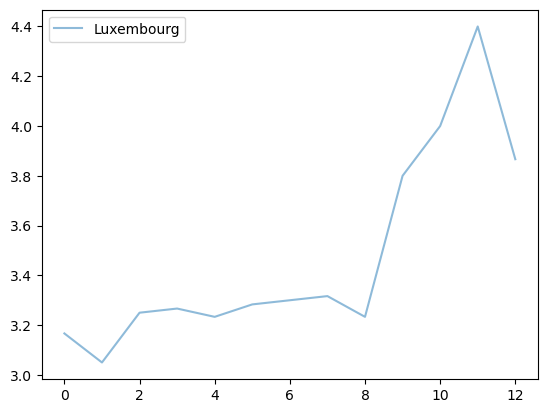

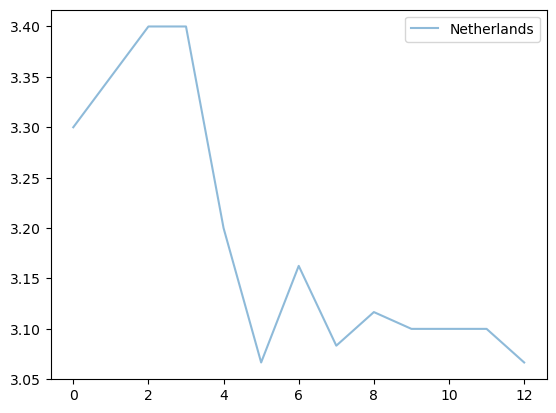

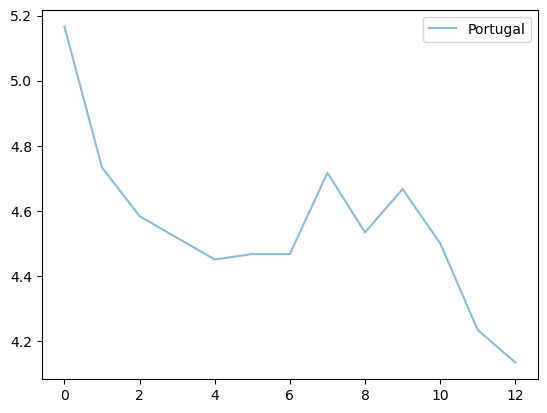

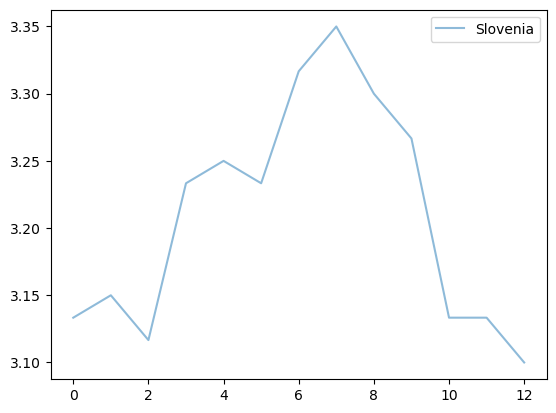

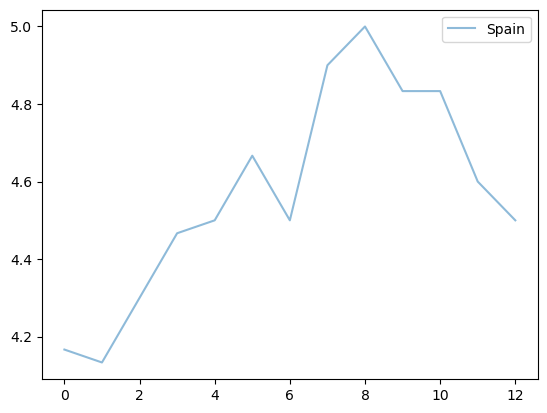

In [20]:
data_backfilled_missingdropped[['Austria']].plot(alpha=0.5);
data_backfilled_missingdropped[['Estonia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Finland']].plot(alpha=0.5);
data_backfilled_missingdropped[['France']].plot(alpha=0.5);
data_backfilled_missingdropped[['Germany']].plot(alpha=0.5);
data_backfilled_missingdropped[['Ireland']].plot(alpha=0.5);
data_backfilled_missingdropped[['Italy']].plot(alpha=0.5);
data_backfilled_missingdropped[['Latvia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Lithuania']].plot(alpha=0.5);
data_backfilled_missingdropped[['Luxembourg']].plot(alpha=0.5);
data_backfilled_missingdropped[['Netherlands']].plot(alpha=0.5);
data_backfilled_missingdropped[['Portugal']].plot(alpha=0.5);
data_backfilled_missingdropped[['Slovenia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Spain']].plot(alpha=0.5);